***Import library***

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

***Hyper Parameters***

In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

batch_size = 1

dataset_dir = 'C:\\Users\\WorkStation\\Desktop\\캡디이미지\\CAE_dataset'
BEST_MODEL_PATH = 'CAE_best_model.pth'

***Load Datasets***

In [3]:
threshold_set = datasets.ImageFolder(
    dataset_dir,
    transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
)

threshold_loader = torch.utils.data.DataLoader(threshold_set, batch_size=batch_size, shuffle=True)

***Model***

In [4]:
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super(ConvAutoEncoder, self).__init__()
        
        # Encoder
        self.cnn_layer1 = nn.Sequential(
                        nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
                        nn.ReLU(),
                         nn.MaxPool2d(2,2))

        self.cnn_layer2 = nn.Sequential(
                                nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
                                nn.ReLU(),
                                 nn.MaxPool2d(2,2))
        
        self.cnn_layer3 = nn.Sequential(
                                nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                                nn.ReLU(),
                                 nn.MaxPool2d(2,2))

        # Decoder        
        self.tran_cnn_layer1 = nn.Sequential(
                        nn.ConvTranspose2d(64, 32, kernel_size = 2, stride = 2, padding=0),
                        nn.ReLU())
        
        self.tran_cnn_layer2 = nn.Sequential(
                        nn.ConvTranspose2d(32, 16, kernel_size = 2, stride = 2, padding=0),
                        nn.ReLU())

        self.tran_cnn_layer3 = nn.Sequential(
                        nn.ConvTranspose2d(16, 3, kernel_size = 2, stride = 2, padding=0),
                        nn.Sigmoid())
            
            
    def forward(self, x):
        output = self.cnn_layer1(x)
        output = self.cnn_layer2(output)
        output = self.cnn_layer3(output)        
        output = self.tran_cnn_layer1(output)
        output = self.tran_cnn_layer2(output)
        output = self.tran_cnn_layer3(output)

        return output

In [6]:
model = ConvAutoEncoder()
model.load_state_dict(torch.load(BEST_MODEL_PATH))
model.to(device)
criterion = nn.MSELoss()

***Threshold***

In [10]:
threshold = np.arange(0.0, 0.008, 0.00001)

err_rate = []
acc_rate = []

best_err = 1.0
best_accuracy = 0.0
best_threshold = {"threshold":[], "err":[]}

for t in threshold:
    print('========== threshold = %.5f ==========' %(t))
    
    err = 0.0
    correct_num = 0.0
    best_accuracy = 0.0
    normal_err = 0
    abnormal_err = 0
    
    for data in threshold_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        
        output = model(images)
        loss = criterion(images, output)
    
        if labels == 0 and loss.item() < t:
            err += 1
        elif labels == 1 and loss.item() > t:
            err += 1
            
    err = err / len(threshold_loader)
    
    acc = 1-err
    err_rate.append(err)
    acc_rate.append(acc)
    
    print(f'error rate : {err}')
    print(f'accuracy : {acc*100}%\n')
    
    if err < best_err:
        best_threshold["threshold"].append(t)
        best_threshold["err"].append(err)

========== threshold = 0.00000 ==========
error rate : 0.12353923205342238
accuracy : 87.64607679465777%

========== threshold = 0.00001 ==========
error rate : 0.12353923205342238
accuracy : 87.64607679465777%

========== threshold = 0.00002 ==========
error rate : 0.12353923205342238
accuracy : 87.64607679465777%

========== threshold = 0.00003 ==========
error rate : 0.12353923205342238
accuracy : 87.64607679465777%

========== threshold = 0.00004 ==========
error rate : 0.12353923205342238
accuracy : 87.64607679465777%

========== threshold = 0.00005 ==========
error rate : 0.12353923205342238
accuracy : 87.64607679465777%

========== threshold = 0.00006 ==========
error rate : 0.12353923205342238
accuracy : 87.64607679465777%

========== threshold = 0.00007 ==========
error rate : 0.12353923205342238
accuracy : 87.64607679465777%

========== threshold = 0.00008 ==========
error rate : 0.12353923205342238
accuracy : 87.64607679465777%

========== threshold = 0.00009 ==========
erro

***Graph***

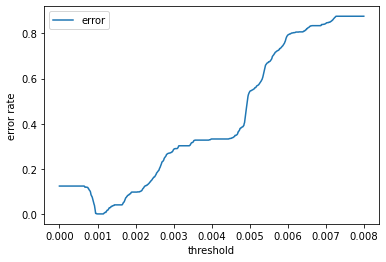

In [11]:
plt.xlabel('threshold')
plt.ylabel('error rate')
plt.plot(threshold, err_rate, label = 'error')
plt.legend()
plt.show()

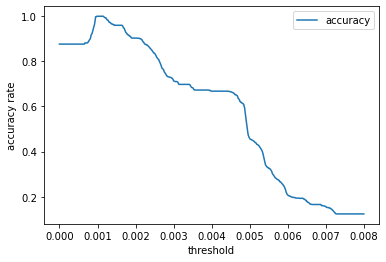

In [12]:
plt.xlabel('threshold')
plt.ylabel('accuracy rate')
plt.plot(threshold, acc_rate, label = 'accuracy')
plt.legend()
plt.show()